# Analyzing Portfolio Risk and Return of large investement firms vs S&P 500

In this challenge/project I seek to assess the portfolios of large investment firms and compare their returns and risk metrics against those of the market (S&P 500). Using python libraries and Jupyter Lab python notebook, I have performed the folling: 

- Import the Data

- Analyze the Performance

- Analyze the Volatility

- Analyze the Risk

- Analyze the Risk-Return Profile

- Diversify the Portfolio



## Import the Data

### Step 1: 

Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
from pathlib import Path
import pandas as pd
import numpy as np
%matplotlib inline

### Step 2: 

Read the data into a DataFrame and set index to the `'date'` column.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
csvpath = Path('Resources/whale_navs.csv')
whale_nav_df = pd.read_csv(csvpath, index_col='date', parse_dates=True, infer_datetime_format=True)

whale_nav_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


### Step 3: 

Calculate daily percent change of each column (investment fund) using `.pct_change()` method call to the dataframe.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
whale_nav_pct_returns = whale_nav_df.pct_change().dropna()

whale_nav_pct_returns.columns = whale_nav_pct_returns.columns.values + ' % daily returns in decimals' #adding descriptive title to header row

whale_nav_pct_returns.head()

,SOROS FUND MANAGEMENT LLC % daily returns in decimals,PAULSON & CO.INC. % daily returns in decimals,TIGER GLOBAL MANAGEMENT LLC % daily returns in decimals,BERKSHIRE HATHAWAY INC % daily returns in decimals,S&P 500 % daily returns in decimals
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

##  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

### Step 1: 

Create descriptive visualization of daily returns of each fund

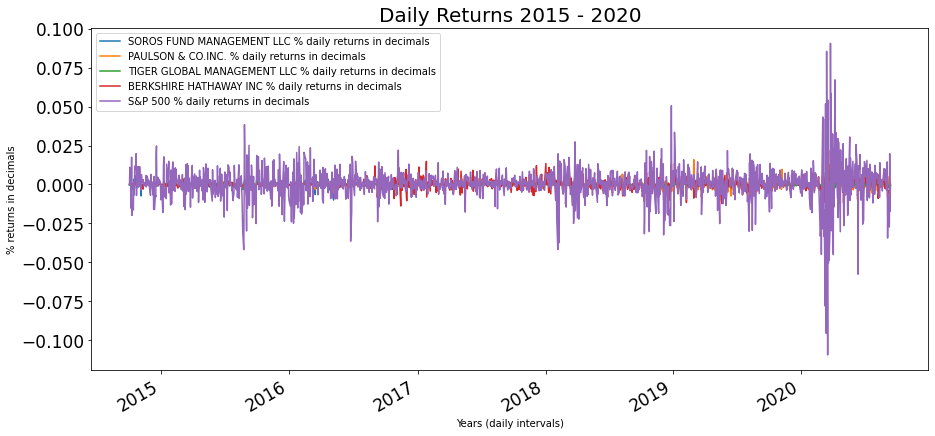

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
ax = whale_nav_pct_returns.plot(
                                title='Daily Returns 2015 - 2020', 
                                figsize=(15,7), 
                                fontsize=17, 
                                xlabel='Years (daily intervals)',
                                ylabel='% returns in decimals'
                                )
ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs



### Step 2: 

Use `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500 and review last 5 rows of the dataframe

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
whale_nav_cumulative_pct_returns = (1 + whale_nav_pct_returns).cumprod()
whale_nav_cumulative_pct_returns.columns = whale_nav_df.columns.values + ' % daily cumulative returns in decimals' #adding descriptive header columns
whale_nav_cumulative_pct_returns.tail()

,SOROS FUND MANAGEMENT LLC % daily cumulative returns in decimals,PAULSON & CO.INC. % daily cumulative returns in decimals,TIGER GLOBAL MANAGEMENT LLC % daily cumulative returns in decimals,BERKSHIRE HATHAWAY INC % daily cumulative returns in decimals,S&P 500 % daily cumulative returns in decimals
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


### Step 3: 

Plot the cumulative returns.

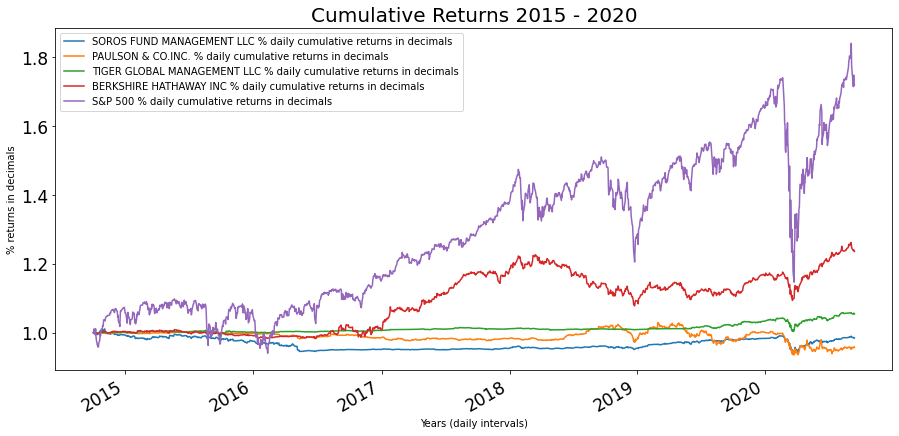

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
ax = whale_nav_cumulative_pct_returns.plot(
                                title='Cumulative Returns 2015 - 2020', 
                                figsize=(15,7), 
                                fontsize=17, 
                                xlabel='Years (daily intervals)',
                                ylabel='% returns in decimals'
                                )
ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs



**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** All firms underperformed the market. Even Warren Buffet's firm (Berkshire) underperformed the S&P 500, though they did outperform the other firms. Some firms like Soros did not even beat inflation rate of the US dollar. 

---

## Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

### Step 1: 

Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. 

[Text(1, 0, 'SOROS FUND MANAGEMENT LLC'),
 Text(2, 0, 'PAULSON & CO.INC.'),
 Text(3, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
 Text(4, 0, 'BERKSHIRE HATHAWAY INC'),
 Text(5, 0, 'S&P 500')]

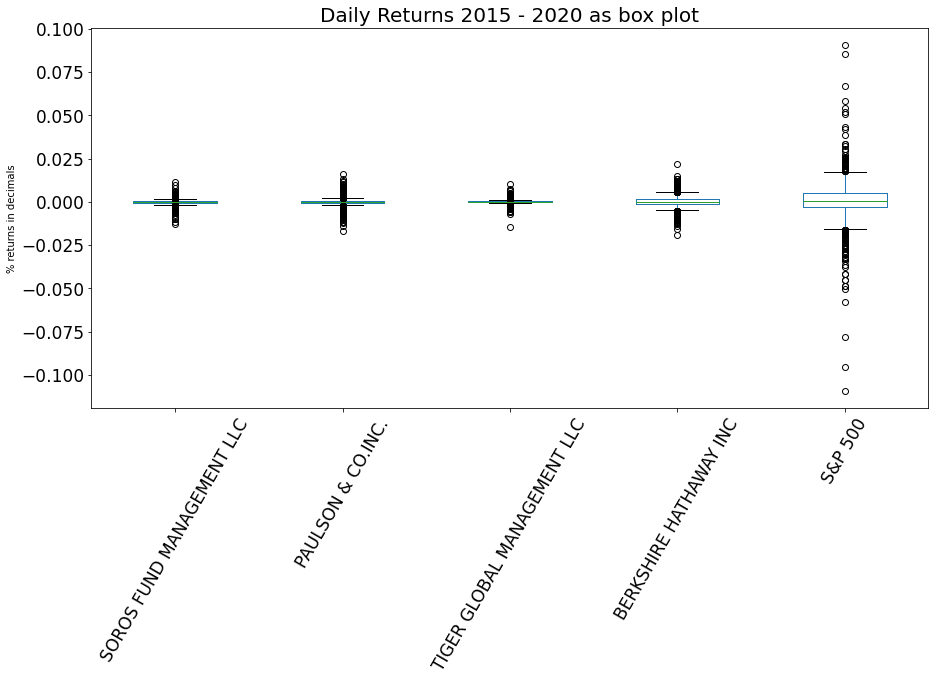

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
ax = whale_nav_pct_returns.plot(
                                kind='box',                            
                                title='Daily Returns 2015 - 2020 as box plot', 
                                figsize=(15,7), 
                                fontsize=17, 
                                xlabel='Years (daily intervals)',
                                ylabel='% returns in decimals'
                                )
ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs
x_label = whale_nav_df.columns.values
ax.set_xticklabels(x_label, rotation=60)

### Step 2: 

Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot.

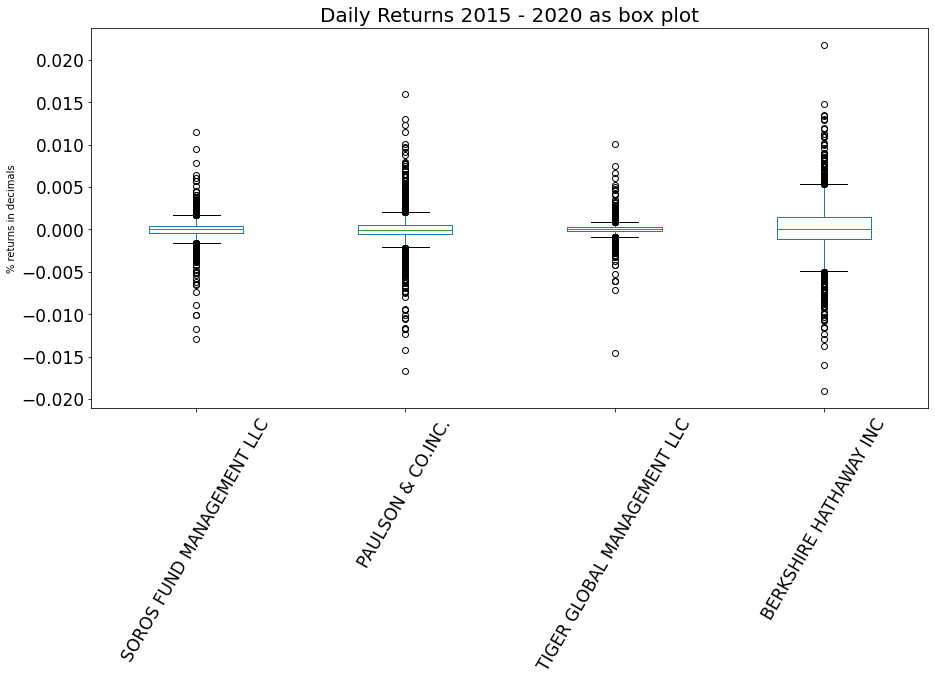

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

whale_nav_minus_sp500 = whale_nav_pct_returns.drop(columns='S&P 500 % daily returns in decimals')

ax = whale_nav_minus_sp500.plot(
                                kind='box',                            
                                title='Daily Returns 2015 - 2020 as box plot', 
                                figsize=(15,7), 
                                fontsize=17, 
                                xlabel='Years (daily intervals)',
                                ylabel='% returns in decimals'
                                )
'''using `.columns.values` attribute to call np array and convert to list using `.tolist()` numpy method
and then use python `.remove()` to remove S&P 500 from x labels, making graph much more readable. Reference numpy docs. 
Doing this because I need to rename the column index (which is of a different size)''' 

x_label = whale_nav_df.columns.values.tolist() 
x_label.remove('S&P 500')
ax.set_xticklabels(x_label,rotation=60)
ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs




**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** 
    
1. Least volatile (smallest spread) = Tiger Global
    
2. Most volatile (largest spread) = Berkshie Hathaway
    


---

## Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

### Step 1: 

Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
print(
'''Standard deviation of funds and the S&P 500
*******************************************************************
'''
)
whale_std = whale_nav_pct_returns.std()
whale_std.sort_values()

Standard deviation of funds and the S&P 500
*******************************************************************



TIGER GLOBAL MANAGEMENT LLC % daily returns in decimals    0.000996
SOROS FUND MANAGEMENT LLC % daily returns in decimals      0.001405
PAULSON & CO.INC. % daily returns in decimals              0.002199
BERKSHIRE HATHAWAY INC % daily returns in decimals         0.003256
S&P 500 % daily returns in decimals                        0.011550
dtype: float64

#### Step 2: 

Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500 (standar deviaiton * sq. root(time)

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
print(
'''Annualized standard deviation of funds and the S&P 500
*******************************************************************
'''
)
annualized_std_whales = whale_std * np.sqrt(252)
annualized_std_whales.sort_values()

Annualized standard deviation of funds and the S&P 500
*******************************************************************



TIGER GLOBAL MANAGEMENT LLC % daily returns in decimals    0.015804
SOROS FUND MANAGEMENT LLC % daily returns in decimals      0.022297
PAULSON & CO.INC. % daily returns in decimals              0.034912
BERKSHIRE HATHAWAY INC % daily returns in decimals         0.051692
S&P 500 % daily returns in decimals                        0.183345
dtype: float64

#### Step 3: 

Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. 


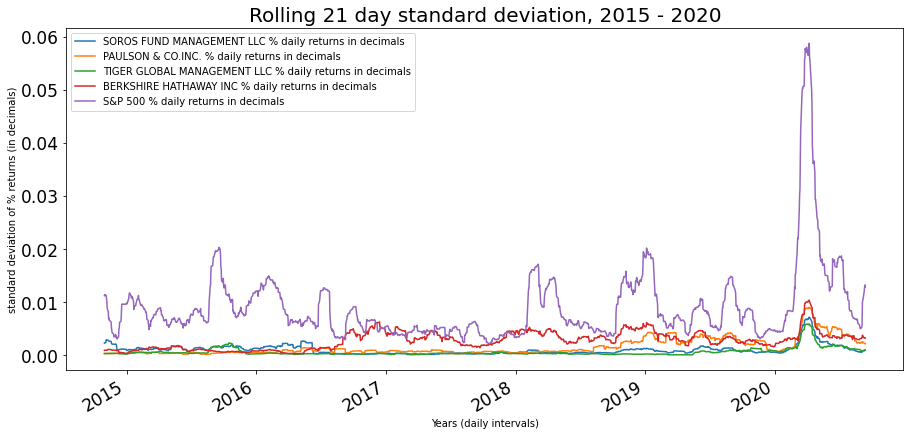

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
ax = whale_nav_pct_returns.rolling(window=21).std().plot(                            
                                                        title='Rolling 21 day standard deviation, 2015 - 2020', 
                                                        figsize=(15,7), 
                                                        fontsize=17, 
                                                        xlabel='Years (daily intervals)',
                                                        ylabel='standard deviation of % returns (in decimals)'
                                                    )

ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs



#### Step 4: 
Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. 

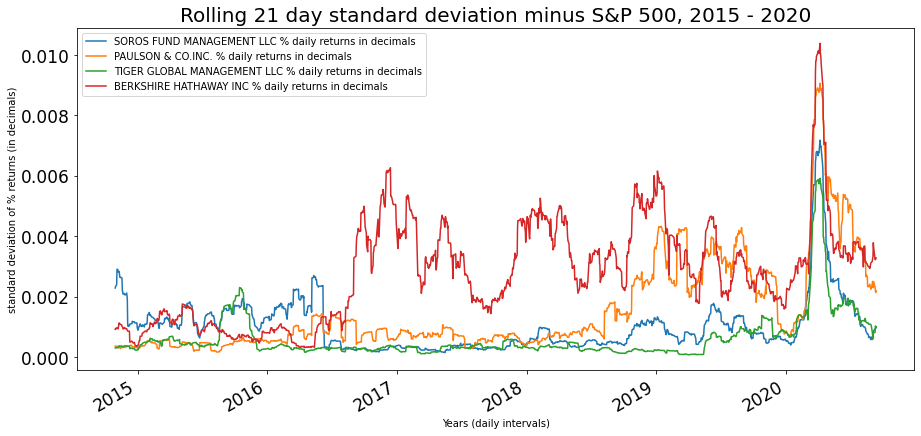

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
ax = whale_nav_minus_sp500.rolling(window=21).std().plot(                            
                                                        title='Rolling 21 day standard deviation minus S&P 500, 2015 - 2020', 
                                                        figsize=(15,7), 
                                                        fontsize=17, 
                                                        xlabel='Years (daily intervals)',
                                                        ylabel='standard deviation of % returns (in decimals)'
                                                    )

ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None. In general these funds are less volatile than the S&P 500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** The risks of each portfolio does increase at roughly the same time risk in the S&P 500 increases. 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire by far shows the highest risk over the largest time period, though from 2015 to mid 2016 showed slightly more risk during that time period. 

---

## Analyze the Risk-Return Profile

I have analyzed various risk metrics (variance, covariance, Sharpe ratio, rolling averages, rolling standard deviations) to decide which portfolio will make for a good investment from a risk-management perspective.

### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500 (252 days).

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
print(
'''Annualized average percent returns (in decimals) of funds and the S&P 500
*********************************************************************************
'''
)
annualized_whales_avg = whale_nav_pct_returns.mean() * 252
annualized_whales_avg.sort_values()

Annualized average percent returns (in decimals) of funds and the S&P 500
*********************************************************************************



PAULSON & CO.INC. % daily returns in decimals             -0.006633
SOROS FUND MANAGEMENT LLC % daily returns in decimals     -0.002281
TIGER GLOBAL MANAGEMENT LLC % daily returns in decimals    0.009151
BERKSHIRE HATHAWAY INC % daily returns in decimals         0.037090
S&P 500 % daily returns in decimals                        0.108102
dtype: float64

### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. Sort values from high to low

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
print(
'''Sharpe Ratios of funds and the S&P 500
*********************************************************************************
'''
)
sharpe_ratio = annualized_whales_avg / annualized_std_whales
sharpe_ratio.sort_values()


Sharpe Ratios of funds and the S&P 500
*********************************************************************************



PAULSON & CO.INC. % daily returns in decimals             -0.189998
SOROS FUND MANAGEMENT LLC % daily returns in decimals     -0.102290
TIGER GLOBAL MANAGEMENT LLC % daily returns in decimals    0.579002
S&P 500 % daily returns in decimals                        0.589612
BERKSHIRE HATHAWAY INC % daily returns in decimals         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

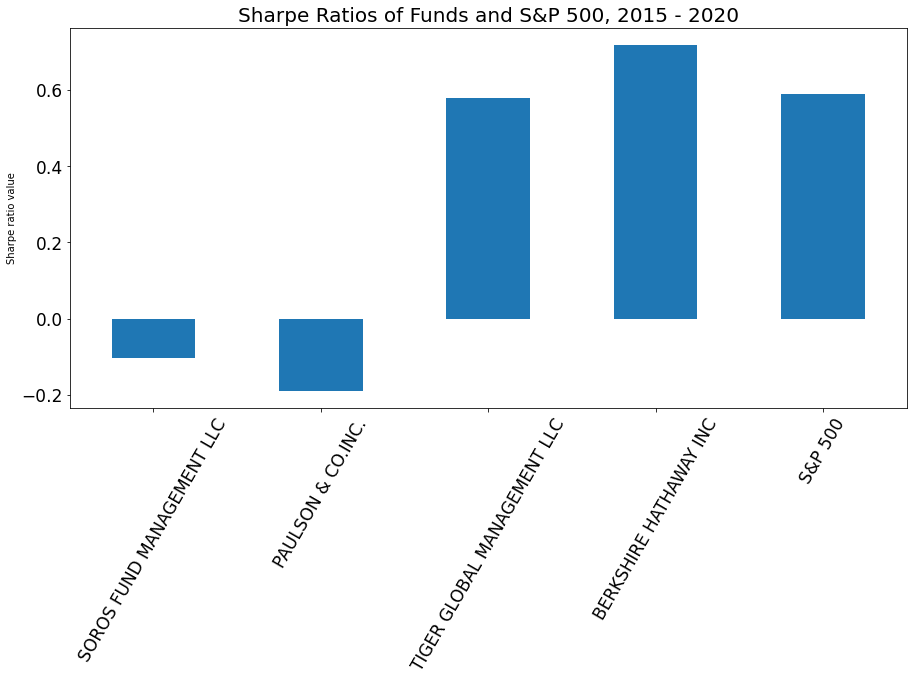

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
ax = sharpe_ratio.plot( 
                        kind='bar',
                        title='Sharpe Ratios of Funds and S&P 500, 2015 - 2020', 
                        figsize=(15,7), 
                        fontsize=17, 
                        xlabel='',
                        ylabel='Sharpe ratio value'
                        )
x_label = whale_nav_df.columns.values
ax.set_xticklabels(x_label,rotation=60)
ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Predictably, Buffett's Berkshire Hathaway fund provides the best risk-reward return based on its Sharpe ratio. The worst return per risk ratio is with Paulson & Co. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_var = whale_nav_pct_returns['S&P 500 % daily returns in decimals'].rolling(60).var()
sp500_var.dropna().tail() #droping first 60 NaN values from dataframe and visualizing tail

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500 % daily returns in decimals, dtype: float64

### Analyzing Berkshire Hathway and Soro Fund portfolios performing the following:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

#### Berkshire Hathaway - Step 1: 

Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
print('''
Comparing portfolio returns of Berkshire Hathway with the market (S&P 500)
***************************************************************************''')

covar_berk = whale_nav_pct_returns['BERKSHIRE HATHAWAY INC % daily returns in decimals'].rolling(60).cov(whale_nav_pct_returns['S&P 500 % daily returns in decimals'].rolling(60))
covar_berk.dropna().tail() #droping first 60 NaN values from dataframe and visualizing tail


Comparing portfolio returns of Berkshire Hathway with the market (S&P 500)
***************************************************************************


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

#### Berkshire Hathaway - Step 2: 

Calculate the beta of the portfolio. Beta = covariance(portfolio, market)/variance(market)

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
beta_berk = covar_berk / sp500_var
beta_berk.dropna().tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

#### Berkshire Hathaway - Step 3: 

Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [19]:
# Calculate the average of the 60-day rolling beta
avg_beta_berk = beta_berk.rolling(60).mean()

#### Berkshire Hathaway - Step 4: 

Plot the 60-day rolling beta.

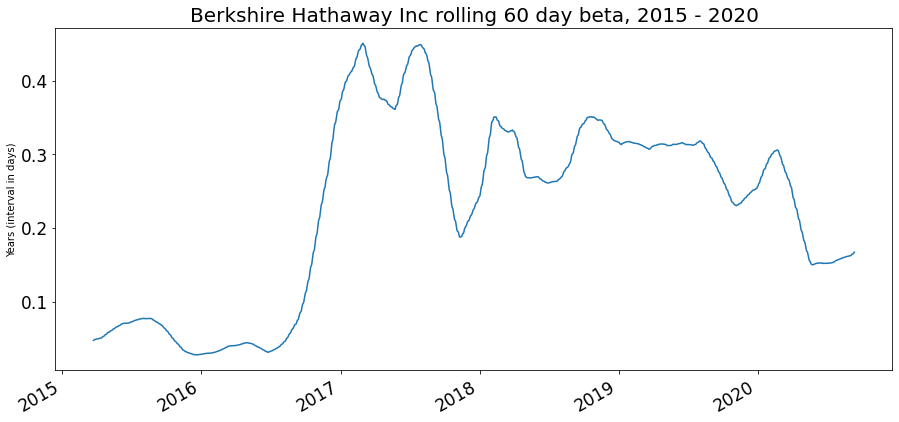

In [20]:
# Plot the rolling beta 
ax = avg_beta_berk.plot( 
                        title='Berkshire Hathaway Inc rolling 60 day beta, 2015 - 2020', 
                        figsize=(15,7), 
                        fontsize=17, 
                        xlabel='',
                        ylabel='Years (interval in days)'
                        )

ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs


#### Soros Fund - Step 1 - Step 4: 

Taking the corresponding steps from the Berkshire Hathaway portfolio above and applying them to the Soro Fund portfolio data.

In [21]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
print('''
Comparing portfolio returns of Berkshire Hathway with the market (S&P 500)
***************************************************************************''')
covar_soros = whale_nav_pct_returns['SOROS FUND MANAGEMENT LLC % daily returns in decimals'].rolling(60).cov(whale_nav_pct_returns['S&P 500 % daily returns in decimals'].rolling(60))
covar_soros.dropna().tail() #droping first 60 NaN values from dataframe and visualizing tail


Comparing portfolio returns of Berkshire Hathway with the market (S&P 500)
***************************************************************************


date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
beta_soros = covar_soros / sp500_var
beta_soros.dropna().tail()

date
2020-09-04    0.086995
2020-09-08    0.084035
2020-09-09    0.081876
2020-09-10    0.082832
2020-09-11    0.082554
dtype: float64

In [23]:
# Calculate the average of the 60-day rolling beta
avg_beta_soros = beta_soros.rolling(60).mean()

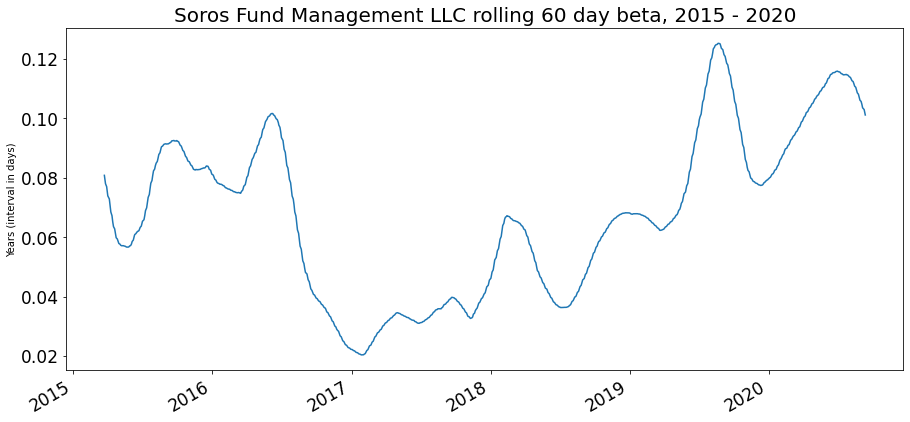

In [24]:
# Plot the rolling beta 
ax = avg_beta_soros.plot( 
                        title='Soros Fund Management LLC rolling 60 day beta, 2015 - 2020', 
                        figsize=(15,7), 
                        fontsize=17, 
                        xlabel='',
                        ylabel='Years (interval in days)'
                        )

ax.title.set_size(20) # change title size using matplotlib ax.title. Reference matplotlib docs


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Berkshire Hathaway has a higher covariance with the S&P 500 and thus is more correlated to the market as compared to the Soros fund.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Berkshire Hathaway is a much better investment from a risk management perspective in that it shows a beta value below 1 (max of about 0.4). It has a higher beta than the Soros fund and also has had better returns overall and displays a healthy balance of reward-risk (highest Sparpe ratio of the 2 portfolios).

---